# Complete EDA on HR prediction dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',na_values="?")

In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1,na_values="?")

In [4]:
column_labels=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']

In [5]:
train_set.columns = column_labels
test_set.columns = column_labels

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [8]:
train_set.shape, test_set.shape

((32560, 15), (16280, 15))

In [9]:
train_set.sample(4, random_state=30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
22576,45,Private,99971,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
7202,40,Self-emp-not-inc,238574,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,>50K
4900,45,Local-gov,197332,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
7753,18,Private,444822,11th,7,Never-married,Sales,Own-child,White,Female,0,0,8,Mexico,<=50K


In [10]:
test_set.sample(4, random_state=30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
6632,59,Private,33725,9th,5,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K.
13176,53,Private,156148,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K.
15099,31,Private,274818,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.
8444,52,Self-emp-not-inc,128378,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.


In [11]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [12]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [13]:
pd.DataFrame([train_set.dtypes, test_set.dtypes], index=['train_set', 'test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [106]:
def object_fun(data):
    for i in data.columns:
        if data[i].dtypes=='O':
            print(i)

In [107]:
object_fun(train_set)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [108]:
object_fun(test_set)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [58]:
def value_counts(data):
    for i in data.columns:
        print (data[i].value_counts())

In [59]:
value_counts(train_set)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int6

In [60]:
value_counts(test_set)

35    461
33    460
23    452
36    450
31    437
     ... 
84      3
88      3
85      2
89      2
87      2
Name: age, Length: 73, dtype: int64
 Private             11209
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64
136986    9
125892    8
190290    8
117310    8
203488    8
         ..
200904    1
308770    1
187792    1
31558     1
83891     1
Name: fnlwgt, Length: 12786, dtype: int64
 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             636
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: education, dtype: int64
9     5283
10    3587
13 

In [82]:
def unique_fun (data):
    for i in data.columns:
        i = data[i].unique()
        print (i)

In [83]:
unique_fun(train_set)

[73]
[9]
[21647]
[16]
[16]
[7]
[15]
[6]
[5]
[2]
[119]
[92]
[94]
[42]
[2]


In [74]:
def nunique_fun(data):
    for i in data.columns:
        data[i] = data[i].nunique()
        print(data[i])


In [75]:
nunique_fun(train_set)

0        73
1        73
2        73
3        73
4        73
         ..
32555    73
32556    73
32557    73
32558    73
32559    73
Name: age, Length: 32560, dtype: int64
0        9
1        9
2        9
3        9
4        9
        ..
32555    9
32556    9
32557    9
32558    9
32559    9
Name: workclass, Length: 32560, dtype: int64
0        21647
1        21647
2        21647
3        21647
4        21647
         ...  
32555    21647
32556    21647
32557    21647
32558    21647
32559    21647
Name: fnlwgt, Length: 32560, dtype: int64
0        16
1        16
2        16
3        16
4        16
         ..
32555    16
32556    16
32557    16
32558    16
32559    16
Name: education, Length: 32560, dtype: int64
0        16
1        16
2        16
3        16
4        16
         ..
32555    16
32556    16
32557    16
32558    16
32559    16
Name: education_num, Length: 32560, dtype: int64
0        7
1        7
2        7
3        7
4        7
        ..
32555    7
32556    7
32557    7

In [84]:
nunique_fun(test_set)

0        73
1        73
2        73
3        73
4        73
         ..
16275    73
16276    73
16277    73
16278    73
16279    73
Name: age, Length: 16280, dtype: int64
0        9
1        9
2        9
3        9
4        9
        ..
16275    9
16276    9
16277    9
16278    9
16279    9
Name: workclass, Length: 16280, dtype: int64
0        12786
1        12786
2        12786
3        12786
4        12786
         ...  
16275    12786
16276    12786
16277    12786
16278    12786
16279    12786
Name: fnlwgt, Length: 16280, dtype: int64
0        16
1        16
2        16
3        16
4        16
         ..
16275    16
16276    16
16277    16
16278    16
16279    16
Name: education, Length: 16280, dtype: int64
0        16
1        16
2        16
3        16
4        16
         ..
16275    16
16276    16
16277    16
16278    16
16279    16
Name: education_num, Length: 16280, dtype: int64
0        7
1        7
2        7
3        7
4        7
        ..
16275    7
16276    7
16277    7

In [14]:
x_train = train_set.copy()
x_test = test_set.copy()

In [15]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [16]:
x_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [17]:
sample = x_train.append(x_test)

C:\Users\saran\AppData\Local\Temp\ipykernel_18028\2578983777.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = x_train.append(x_test)


In [18]:
sample.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [19]:
sample.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000
mean,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400
std,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48840 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       48840 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education_num   48840 non-null  int64 
 5   marital_status  48840 non-null  object
 6   occupation      48840 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital_gain    48840 non-null  int64 
 11  capital_loss    48840 non-null  int64 
 12  hours_per_week  48840 non-null  int64 
 13  native_country  48840 non-null  object
 14  wage_class      48840 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [21]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  wage_class      32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [22]:
sample.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,48840,48840,48840,48840,48840,48840,48840,48840,48840
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33905,15784,22379,6172,19716,41761,32648,43830,24719


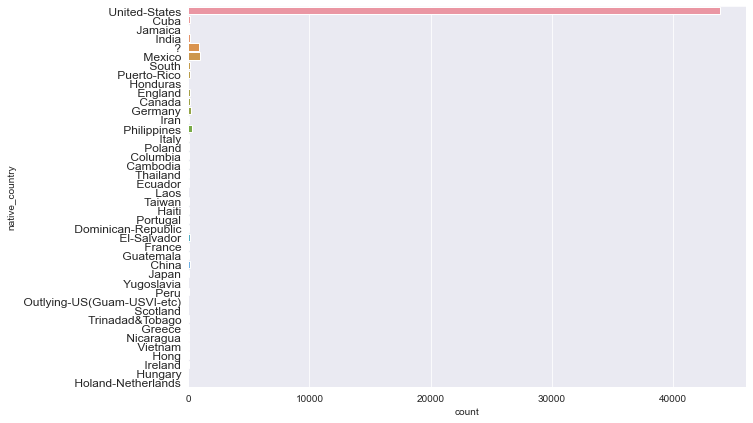

In [23]:
plt.figure(figsize=(10,7))
sns.set_style(style='darkgrid')
sns.countplot(y = sample.native_country)
sns.countplot(y = sample.native_country).set_yticklabels(sns.countplot(y = sample.native_country).get_yticklabels(), rotation=0, fontsize = 12)
plt.show()

In [24]:
train_set = train_set.apply(lambda x: x.replace(' ?', np.nan))

In [25]:
test_set = test_set.apply(lambda x: x.replace(' ?', np.nan))

In [26]:
train_set.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [27]:
test_set.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
wage_class          0
dtype: int64

In [28]:
train_set = train_set.dropna()

In [29]:
test_set = test_set.dropna()

In [30]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [31]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [32]:
(train_set.isnull().sum(), test_set.isnull().sum())

(age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64,
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64)

In [33]:
sex_cat = {}

count = 0

for i in train_set.sex.unique():
    sex_cat[i] = count
    count += 1
    
sex_cat


{' Male': 0, ' Female': 1}

In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  wage_class      32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
wageclass_cat = {}

count = 0

for i in train_set.wage_class.unique():
    wageclass_cat[i] = count
    count += 1
    
wageclass_cat

{' <=50K': 0, ' >50K': 1}

In [36]:
workclass_cat = {}

count = 0

for i in train_set.workclass.unique():
    workclass_cat[i] = count
    count += 1
    
workclass_cat

{' Self-emp-not-inc': 0,
 ' Private': 1,
 ' State-gov': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Self-emp-inc': 5,
 ' Without-pay': 6}

In [37]:
education_cat = {}

count = 0

for i in train_set.education.unique():
    education_cat[i] = count
    count += 1
    
education_cat

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' 7th-8th': 7,
 ' Doctorate': 8,
 ' Assoc-voc': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' Preschool': 13,
 ' 12th': 14,
 ' 1st-4th': 15}

In [38]:
maritalstatus_cat = {}

count = 0

for i in train_set.marital_status.unique():
    maritalstatus_cat[i] = count
    count += 1
    
maritalstatus_cat

{' Married-civ-spouse': 0,
 ' Divorced': 1,
 ' Married-spouse-absent': 2,
 ' Never-married': 3,
 ' Separated': 4,
 ' Married-AF-spouse': 5,
 ' Widowed': 6}

In [39]:
occupation_cat = {}

count = 0

for i in train_set.occupation.unique():
    occupation_cat[i] = count
    count += 1
occupation_cat

{' Exec-managerial': 0,
 ' Handlers-cleaners': 1,
 ' Prof-specialty': 2,
 ' Other-service': 3,
 ' Adm-clerical': 4,
 ' Sales': 5,
 ' Transport-moving': 6,
 ' Farming-fishing': 7,
 ' Machine-op-inspct': 8,
 ' Tech-support': 9,
 ' Craft-repair': 10,
 ' Protective-serv': 11,
 ' Armed-Forces': 12,
 ' Priv-house-serv': 13}

In [40]:
relationship_cat = {}

count = 0

for i in train_set.relationship.unique():
    relationship_cat[i] = count
    count += 1
    
relationship_cat

{' Husband': 0,
 ' Not-in-family': 1,
 ' Wife': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Other-relative': 5}

In [41]:
race_cat = {}

count = 0

for i in train_set.race.unique():
    race_cat[i] = count
    count += 1
    
race_cat

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [42]:
nativecountry_cat = {}

count = 0

for i in train_set.native_country.unique():
    nativecountry_cat[i] = count
    count += 1
    
nativecountry_cat

{' United-States': 0,
 ' Cuba': 1,
 ' Jamaica': 2,
 ' India': 3,
 ' Mexico': 4,
 ' Puerto-Rico': 5,
 ' Honduras': 6,
 ' England': 7,
 ' Canada': 8,
 ' Germany': 9,
 ' Iran': 10,
 ' Philippines': 11,
 ' Poland': 12,
 ' Columbia': 13,
 ' Cambodia': 14,
 ' Thailand': 15,
 ' Ecuador': 16,
 ' Laos': 17,
 ' Taiwan': 18,
 ' Haiti': 19,
 ' Portugal': 20,
 ' Dominican-Republic': 21,
 ' El-Salvador': 22,
 ' France': 23,
 ' Guatemala': 24,
 ' Italy': 25,
 ' China': 26,
 ' South': 27,
 ' Japan': 28,
 ' Yugoslavia': 29,
 ' Peru': 30,
 ' Outlying-US(Guam-USVI-etc)': 31,
 ' Scotland': 32,
 ' Trinadad&Tobago': 33,
 ' Greece': 34,
 ' Nicaragua': 35,
 ' Vietnam': 36,
 ' Hong': 37,
 ' Ireland': 38,
 ' Hungary': 39,
 ' Holand-Netherlands': 40}

In [43]:
train_set.sex.value_counts()

 Male      20379
 Female     9782
Name: sex, dtype: int64

In [44]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [45]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [46]:
train_set['workclass'] = train_set['workclass'].map(workclass_cat)
train_set['education'] = train_set['education'].map(education_cat)
train_set['marital_status'] = train_set['marital_status'].map(maritalstatus_cat)
train_set['occupation'] = train_set['occupation'].map(occupation_cat)
train_set['relationship'] = train_set['relationship'].map(relationship_cat)
train_set['race'] = train_set['race'].map(race_cat)
train_set['sex'] = train_set['sex'].map(sex_cat)
train_set['native_country'] = train_set['native_country'].map(nativecountry_cat)
train_set['wage_class'] = train_set['wage_class'].map(wageclass_cat)

In [47]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0


In [48]:
test_set['workclass'] = test_set['workclass'].map(workclass_cat)
test_set['education'] = test_set['education'].map(education_cat)
test_set['marital_status'] = test_set['marital_status'].map(maritalstatus_cat)
test_set['occupation'] = test_set['occupation'].map(occupation_cat)
test_set['relationship'] = test_set['relationship'].map(relationship_cat)
test_set['race'] = test_set['race'].map(race_cat)
test_set['sex'] = test_set['sex'].map(sex_cat)
test_set['native_country'] = test_set['native_country'].map(nativecountry_cat)
test_set['wage_class'] = test_set['wage_class'].map(wageclass_cat)

In [49]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,1,89814,1,9,0,7,0,0,0,0,0,50,0,NaN
1,28,4,336951,6,12,0,11,0,0,0,0,0,40,0,NaN
2,44,1,160323,5,10,0,8,0,1,0,7688,0,40,0,NaN
4,34,1,198693,12,6,3,3,1,0,0,0,0,30,0,NaN
6,63,0,104626,10,15,0,2,0,0,0,3103,0,32,0,NaN


In [50]:
sample.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

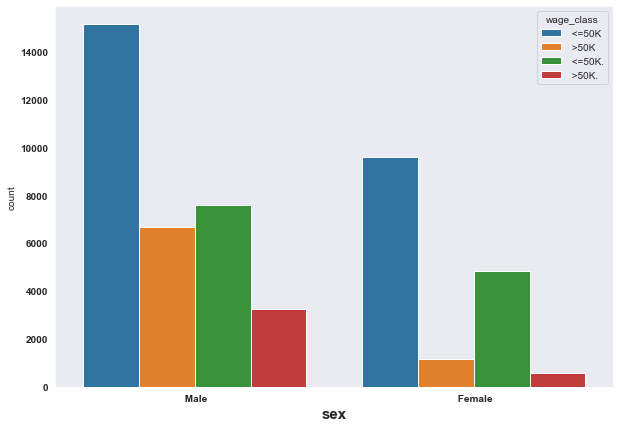

In [51]:
plt.figure(figsize=(10,7))
sns.set_style(style='dark')
sns.countplot(sample.sex, hue='wage_class', data=sample)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.xlabel('sex', fontsize=15, fontweight='bold')
plt.ylabel('count', )

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


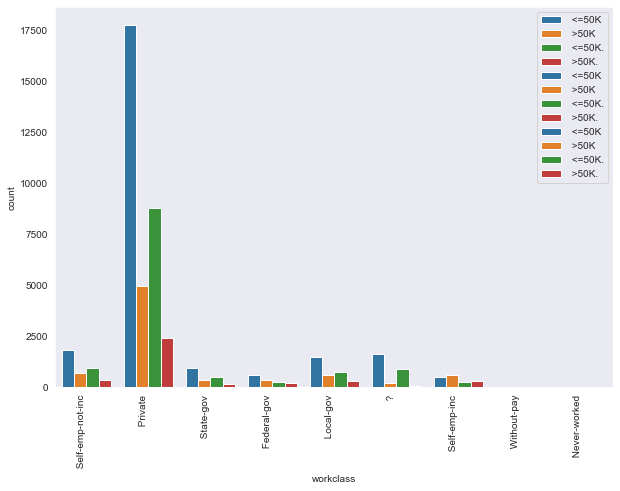

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(sample.workclass, hue = sample.wage_class)
sns.countplot(sample.workclass, hue = sample.wage_class).set_xticklabels(sns.countplot(sample.workclass, hue = sample.wage_class).get_xticklabels(), rotation=90, ha='right')
plt.legend(loc='upper right')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


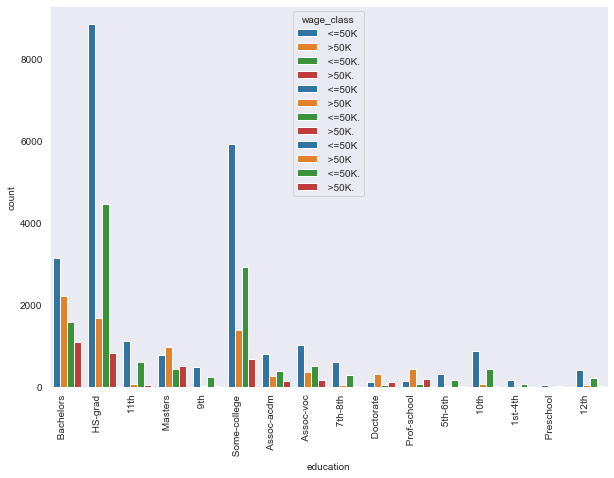

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(sample.education, hue=sample.wage_class)
sns.countplot(sample.education, hue=sample.wage_class).set_xticklabels(sns.countplot(sample.education, hue=sample.wage_class).get_xticklabels(), rotation=90, ha='right')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


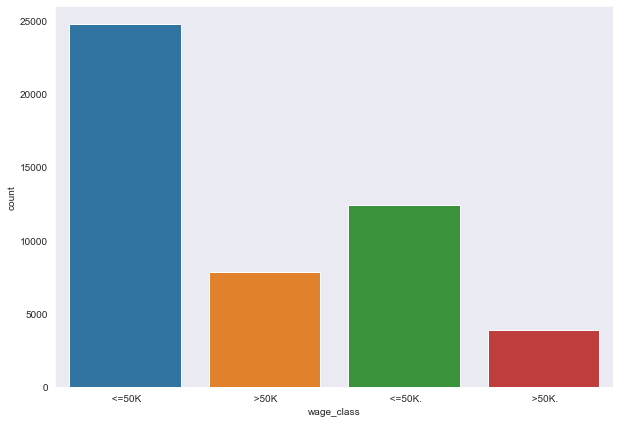

In [54]:
plt.figure(figsize=(10,7))
sns.countplot(sample.wage_class)
plt.show()

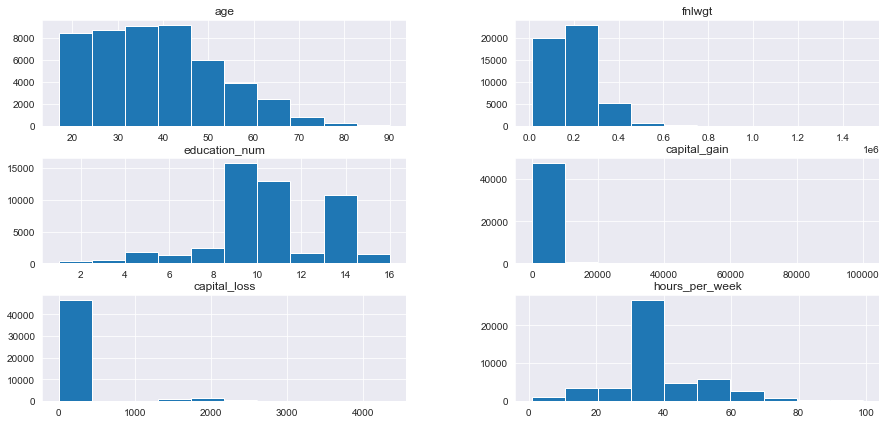

In [60]:
pd.DataFrame.hist(data=sample, figsize=(15,7))
plt.show()